In [14]:
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

from tqdm import trange, tqdm

from collections import defaultdict, Counter
from itertools import combinations

In [15]:
def read_snap(edge_file, com_file, prefix=""):
    edges = pd.read_csv(prefix+edge_file, sep='\t', comment="#")
    coms = []
    with open(prefix+com_file, "r") as infile:
        for line in infile:
            x = line[:-1]  # drop trailing newline
            x = x.split('\t')
            coms.append(frozenset([int(y) for y in x])) ## map to 0-based

    g = ig.Graph.DataFrame(edges, directed=False)

    c = [set() for _ in range(g.vcount())]
    for i, com in enumerate(coms):
        for v in com:
            c[v].add(i)
    c = [frozenset(i) for i in c] 
    g.vs["comms"] = c

    # Vertex list is not continugous, drop degree 0 vertices
    g = g.subgraph(np.arange(g.vcount())[np.array(g.degree()) > 0])  

    # Drop some vars to free up memory
    del edges

    return g, c


def read_abcdoo_coms(com_file, prefix=""):
    ## read communities
    file = prefix+com_file
    c = []
    with open(file, "r") as infile:
        for line in infile:
            x = line.split('\t')
            c.append(frozenset([int(y)-1 for y in x[1].rstrip()[1:-1].split(',')])) ## map to 0-based

    return c

In [16]:
## DBLP graph
dblp_g, dblp_coms = read_snap("com-dblp.ungraph.txt", "com-dblp.all.cmty.txt", "../../SNAP/")
abcdoo_d2_cs = read_abcdoo_coms("abcdoo_dblp_d2_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d5_cs = read_abcdoo_coms("abcdoo_dblp_d5_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d10_cs = read_abcdoo_coms("abcdoo_dblp_d10_com.dat", "../../ABCDGraphGenerator.jl/utils/")
cbk_cs = read_abcdoo_coms("dblp_cbk.dat", "../")

dblp_cs = dblp_g.vs["comms"]
print(f"DBLP has {dblp_g.vcount()} vertices.")
print(f"DBLP has {dblp_g.ecount()} edges.")
print(f"DBLP has {len(dblp_coms)} communities.")

DBLP has 317080 vertices.
DBLP has 1049865 edges.
DBLP has 425957 communities.


Values less than or equal to 0 in data. Throwing out 0 or negative values


DBLP

gamma: 2.6010423529420046
l': 2.0
KS statistic: 0.09781105075236318
D=2

gamma: 3.5227113223928948
l': 2.0
KS statistic: 0.2823773514242014
D=5

gamma: 3.728429136088581
l': 2.0
KS statistic: 0.3149158849681527
D=10

gamma: 3.245507169212823
l': 2.0
KS statistic: 0.18795793136557676
CBK

gamma: 2.5659527404807667
l': 2.0
KS statistic: 0.06649655729477988


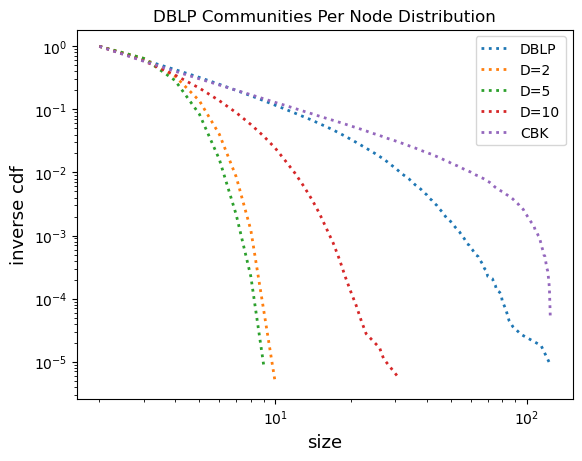

In [17]:
fig, ax = plt.subplots()

options = [dblp_cs, abcdoo_d2_cs, abcdoo_d5_cs, abcdoo_d10_cs, cbk_cs]
names = ["DBLP", "D=2", "D=5", "D=10", "CBK"]
for cs, name in zip(options, names):
    X = powerlaw.Fit([len(x) for x in cs], xmin=2)
    #X.power_law.plot_ccdf(ax=ax, color=color, linestyle="-", label=name)
    X.plot_ccdf(ax=ax, linewidth=2, original_data=False, linestyle=":", label=name)

    print(name)
    print("\ngamma:", X.power_law.alpha)
    print("l':", X.power_law.xmin)
    print("KS statistic:", X.power_law.D)

ax.set_title("DBLP Communities Per Node Distribution")
ax.legend()
ax.set_xlabel("size", fontsize=13)
ax.set_ylabel("inverse cdf", fontsize=13);

In [18]:
## Amazon graph
amazon_g, amazon_coms = read_snap("com-amazon.ungraph.txt", "com-amazon.all.dedup.cmty.txt", "../../SNAP/")
abcdoo_d2_cs = read_abcdoo_coms("abcdoo_amazon_d2_com_only.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d5_cs = read_abcdoo_coms("abcdoo_amazon_d5_com_only.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d10_cs = read_abcdoo_coms("abcdoo_amazon_d10_com_only.dat", "../../ABCDGraphGenerator.jl/utils/")
cbk_cs = read_abcdoo_coms("amazon_cbk.dat", "../")

amazon_cs = amazon_g.vs["comms"]
print(f"Amazon has {amazon_g.vcount()} vertices.")
print(f"Amazon has {amazon_g.ecount()} edges.")
print(f"Amazon has {len(amazon_coms)} communities.")

Amazon has 334863 vertices.
Amazon has 925871 edges.
Amazon has 548552 communities.


Amazon

gamma: 1.878245198480439
l': 2.0
KS statistic: 0.28988041205562376


Values less than or equal to 0 in data. Throwing out 0 or negative values


D=2

gamma: 1.8430619173454934
l': 2.0
KS statistic: 0.31484162065784493
D=5

gamma: 1.8230559634077732
l': 2.0
KS statistic: 0.3984808839182047
D=10

gamma: 1.892017343085221
l': 2.0
KS statistic: 0.29890811278120855
CBK

gamma: 8.10832543566482
l': 2.0
KS statistic: 0.18152389502004473


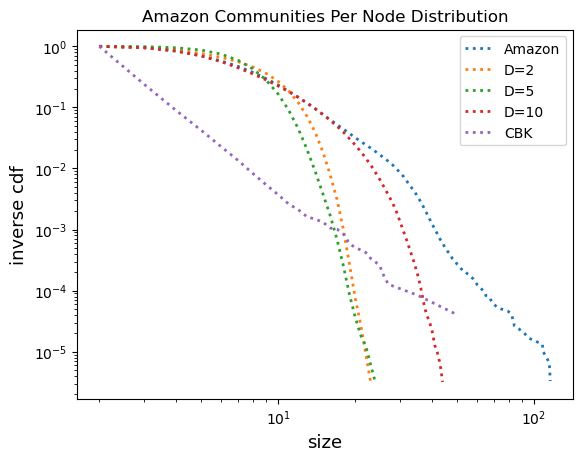

In [19]:
fig, ax = plt.subplots()

options = [amazon_cs, abcdoo_d2_cs, abcdoo_d5_cs, abcdoo_d10_cs, cbk_cs]
names = ["Amazon", "D=2", "D=5", "D=10", "CBK"]
for cs, name in zip(options, names):
    X = powerlaw.Fit([len(x) for x in cs], xmin=2)
    #X.power_law.plot_ccdf(ax=ax, color=color, linestyle="-", label=name)
    X.plot_ccdf(ax=ax, linewidth=2, original_data=False, linestyle=":", label=name)

    print(name)
    print("\ngamma:", X.power_law.alpha)
    print("l':", X.power_law.xmin)
    print("KS statistic:", X.power_law.D)

ax.set_title("Amazon Communities Per Node Distribution")
ax.legend()
ax.set_xlabel("size", fontsize=13)
ax.set_ylabel("inverse cdf", fontsize=13);